<a href="https://colab.research.google.com/github/gopikumar936/Automated-Image-Captioning/blob/master/Eazydiner_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno


In [7]:
#Importing Dataset 
signup_data = pd.read_excel("/content/drive/MyDrive/Dataset /Sample_CUSTOMER_Dataset_2.xlsx")
booking_data = pd.read_excel("/content/drive/MyDrive/Dataset /Sample_BOOKINGS_Dataset_1.xlsx")

In [8]:
booking_data.head()

,date,medium,restaurant_name,location,cust_id
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123


In [9]:
signup_data.head()

,cust_id,name,city,gender,AGE,medium,signup_date
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01
2,5015431352114,mani,Chennai,M,29,android,2020-09-01
3,5015431352115,Rija,Kolkata,F,60,google,2020-09-01
4,5015431352120,Bharath,NaN,M,32,google,2020-09-01


In [11]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61333 entries, 0 to 61332
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61333 non-null  datetime64[ns]
 1   medium           61333 non-null  object        
 2   restaurant_name  61333 non-null  object        
 3   location         61333 non-null  object        
 4   cust_id          61333 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
signup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98354 entries, 0 to 98353
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cust_id      98354 non-null  int64         
 1   name         92756 non-null  object        
 2   city         80621 non-null  object        
 3   gender       4700 non-null   object        
 4   AGE          98354 non-null  int64         
 5   medium       98354 non-null  object        
 6   signup_date  98354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.3+ MB


In [13]:
#Merging Both the dataset into one dataframe on cust_id column using outer join 
Merged_data = pd.merge(left=booking_data, right=signup_data, how='outer', left_on='cust_id', right_on='cust_id')

In [14]:
Merged_data.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,F,27,google,2020-09-01
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,2020-09-01
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,M,38,google,2020-09-01


In [22]:
Merged_data.shape

(98354, 11)

In [15]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98354 entries, 0 to 98353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61333 non-null  datetime64[ns]
 1   medium_x         61333 non-null  object        
 2   restaurant_name  61333 non-null  object        
 3   location         61333 non-null  object        
 4   cust_id          98354 non-null  int64         
 5   name             92756 non-null  object        
 6   city             80621 non-null  object        
 7   gender           4700 non-null   object        
 8   AGE              98354 non-null  int64         
 9   medium_y         98354 non-null  object        
 10  signup_date      98354 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.0+ MB


In [21]:
#Checking Missing Value
print(Merged_data.isnull().any())
print("Count of Missing Value in each columns/feature")
print(Merged_data.isnull().sum())

date                True
medium_x            True
restaurant_name     True
location            True
cust_id            False
name                True
city                True
gender              True
AGE                False
medium_y           False
signup_date        False
dtype: bool
Count of Missing Value in each columns/feature
date               37021
medium_x           37021
restaurant_name    37021
location           37021
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
dtype: int64


In [23]:
#Eliminating duplicate rows after merging
Merged_data[Merged_data.duplicated(keep = 'first' , subset = ['cust_id'])]

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date


In [25]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98354 entries, 0 to 98353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61333 non-null  datetime64[ns]
 1   medium_x         61333 non-null  object        
 2   restaurant_name  61333 non-null  object        
 3   location         61333 non-null  object        
 4   cust_id          98354 non-null  int64         
 5   name             92756 non-null  object        
 6   city             80621 non-null  object        
 7   gender           4700 non-null   object        
 8   AGE              98354 non-null  int64         
 9   medium_y         98354 non-null  object        
 10  signup_date      98354 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.0+ MB


In [ ]:
Merged_data.sort_values(by=['cust_id'], inplace=True)
Merged_data.reset_index(drop=True, inplace=True)

In [29]:
Merged_data.isnull().sum()

date               37021
medium_x           37021
restaurant_name    37021
location           37021
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
dtype: int64

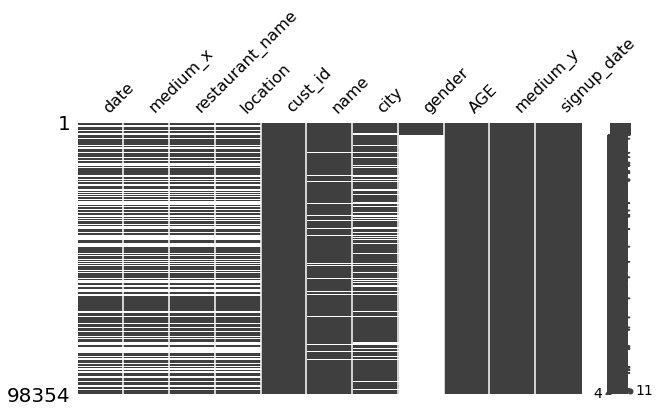

In [28]:
missingno.matrix(Merged_data,figsize=(10,5))

#    Observations 
 1) There are missing values in columns except cust_id,AGE,medium_y and signup_date


2) Number of Missing value in column Gender is very high . so We will drop this column



3)The columns medium_x and medium_y are same for a particular customer, but some values are missing in medium_x so we can replace those missing values with the values in medium_y.
After creating new column "medium" . medium_x and medium_y become redundant. So we will drop these columns too. 

In [36]:
Merged_data.drop("gender",axis=1 , inplace=True)

In [31]:
#Creating a new column medium which contains all the values in medium_x after filling missing values
Merged_data['medium']= Merged_data['medium_x'].fillna(Merged_data['medium_y'])

In [40]:
Merged_data.drop(labels=["medium_x","medium_y"],axis=1,inplace=True)

In [41]:
Merged_data.head(3)

,date,restaurant_name,location,cust_id,name,city,AGE,signup_date,medium
0,2020-09-04,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,72,2020-09-01,web
1,NaT,NaN,NaN,5015431352113,Manish,Delhi NCR,45,2020-09-01,android
2,NaT,NaN,NaN,5015431352114,mani,Chennai,29,2020-09-01,android


In [43]:
##Creating new_column "Duration" denotes difference in booking_date and signup_date 
from datetime import timedelta
Merged_data['Duration'] = Merged_data['date']-Merged_data['signup_date']
Merged_data['Duration'] = Merged_data['Duration']/timedelta(days=1)

In [46]:
##As we created a new column based on date and signup_date. These columns become reduntant so , we will drop these columns
Merged_data.drop(labels=["date","signup_date"],axis=1,inplace=True)

In [47]:
Merged_data.head()

,restaurant_name,location,cust_id,name,city,AGE,medium,Duration
0,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,72,web,3.0
1,NaN,NaN,5015431352113,Manish,Delhi NCR,45,android,NaN
2,NaN,NaN,5015431352114,mani,Chennai,29,android,NaN
3,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,60,google,5.0
4,NaN,NaN,5015431352120,Bharath,NaN,32,google,NaN


Based on the 'Duration' column we will create a new column 'Booked_status' which will denote whether a customer has done the booking within 7 days of signing up or not

In [48]:
# 0 - customers who have not booked after signup or those who have not booked within 7 days
# 1 - customers who have booked within 7 days 
Merged_data['Booked_status']= np.where(Merged_data['Duration']>7,0, np.where(Merged_data['Duration'].isnull(), 0, 1))

In [49]:
Merged_data.head()

,restaurant_name,location,cust_id,name,city,AGE,medium,Duration,Booked_status
0,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,72,web,3.0,1
1,NaN,NaN,5015431352113,Manish,Delhi NCR,45,android,NaN,0
2,NaN,NaN,5015431352114,mani,Chennai,29,android,NaN,0
3,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,60,google,5.0,1
4,NaN,NaN,5015431352120,Bharath,NaN,32,google,NaN,0


In [51]:
Merged_data.isnull().sum()

restaurant_name    37021
location           37021
cust_id                0
name                5598
city               17733
AGE                    0
medium                 0
Duration           37021
Booked_status          0
dtype: int64

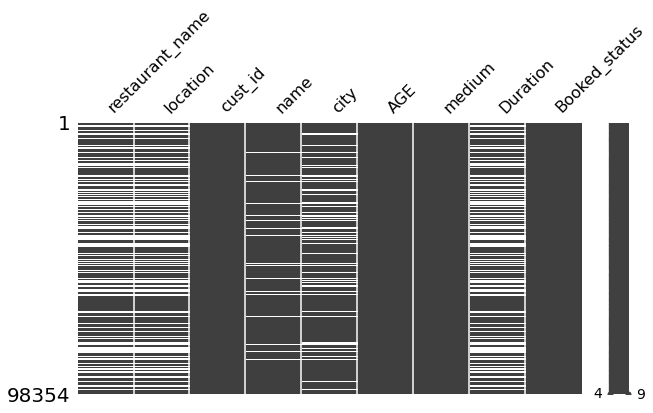

In [50]:
missingno.matrix(Merged_data,figsize=(10,5))

1) We can see that the number of missing values in all the 3 columns 'restaurant_name', 'location' and 'duration' are same which makes sense because there are missing values in the 'duration' column for those customers who have not done booking after signing up and hence the restaurant_name and location will also be not there in the records for such customers and hence the value under column 'Booked' will be 0 for all of them.

2) So we can infer that these missing values are directly related to the 'Booked' column. So we need to take care of these missing values as we cannot directly drop them.

3) We can fill number greater that 7 in 'Duration' column to replace null value so that 'booked_status' value is maintained at 0.

In [57]:
#Replacing null values with 8 in 'duration'.
Merged_data['Duration'] = Merged_data['Duration'].fillna(8).astype(int)

In [58]:
#Replacing null values in 'restaurant_name' with a new category 'restaurant_name_null'.
Merged_data['restaurant_name'] = Merged_data['restaurant_name'].fillna('restaurant_name_null')

In [59]:
#Replacing null values in 'location' with a new category 'location_null'.
Merged_data['location'] = Merged_data['location'].fillna('location_null')

In [62]:
##Replacing null values in 'city' with a new category 'city_null'.
Merged_data['city'] = Merged_data['city'].fillna('city_null')

In [60]:
Merged_data.head()

,restaurant_name,location,cust_id,name,city,AGE,medium,Duration,Booked_status
0,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,72,web,3,1
1,restaurant_name_null,location_null,5015431352113,Manish,Delhi NCR,45,android,8,0
2,restaurant_name_null,location_null,5015431352114,mani,Chennai,29,android,8,0
3,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,60,google,5,1
4,restaurant_name_null,location_null,5015431352120,Bharath,NaN,32,google,8,0
